In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random

In [2]:
path = '../Dataset/Dataset.tsv'

# Read the dataset
df = pd.read_csv(path, sep='\t')

df.head()

,Study ID,Patient ID,Sample ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,...,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Number of Samples Per Patient,Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,mds_iwg_2022,E-H-100000,E-H-100000-T1-1-D1-1,57.0,4.65,3.0,normal,NaN,5q,NaN,...,69.830137,0:LIVING,0.0,406.0,NaN,1,Female,23.920896,7.50,MDS-del5q
1,mds_iwg_2022,E-H-100001,E-H-100001-T1-1-D1-1,56.0,2.88,2.0,normal,NaN,5q,NaN,...,34.290411,0:LIVING,0.0,364.0,NaN,1,Female,6.523881,7.21,MDS-del5q
2,mds_iwg_2022,E-H-100002,E-H-100002-T1-1-D1-1,72.0,0.49,15.0,cnloh,NaN,5q,17p,...,3.682192,1:DECEASED,0.0,35.0,NaN,1,Female,6.523881,2.60,MDS-EB2
3,mds_iwg_2022,E-H-100004,E-H-100004-T1-1-D1-1,40.0,1.56,3.0,normal,NaN,NaN,NaN,...,62.235616,0:LIVING,0.0,708.0,NaN,1,Female,4.349254,2.55,MDS/MPN-U
4,mds_iwg_2022,E-H-100005,E-H-100005-T1-1-D1-1,45.0,1.25,2.0,normal,NaN,NaN,NaN,...,67.758904,0:LIVING,0.0,141.0,NaN,1,Female,6.523881,2.31,MDS-MLD


In [3]:
#drop column Study ID
df = df.drop(['Study ID'], axis=1)
df = df.drop(['Sample ID'], axis=1)
df = df.drop(['Number of Samples Per Patient'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       3323 non-null   object 
 1   Age in years                     3303 non-null   float64
 2   Absolute Neutrophil Count (G/L)  3130 non-null   float64
 3   BM Blast (%)                     3214 non-null   float64
 4   Chromosomal Status at TP53       3323 non-null   object 
 5   CNACS Called Chr Arm Gain        159 non-null    object 
 6   CNACS Called Chr Arm Loss        668 non-null    object 
 7   CNACS Called Chr Arm Upd         359 non-null    object 
 8   CNACS Called Gene Gain           150 non-null    object 
 9   CNACS Called Gene Loss           647 non-null    object 
 10  CNACS Called Gene Upd            355 non-null    object 
 11  Complex Karyotype                3323 non-null   object 
 12  Cytogenetics        

In [4]:
QI = {'Age in years ', 'Sex', 'IPSS-M ', 'IPSS-R', 'Mutation Count', 'TMB (nonsynonymous)'}

df.dropna(subset=QI, inplace=True)

for col in QI:
    print(col+'\t')
    n = len(df[col].unique())
    print(df[col].unique())
    print('total of uniques: ', n)
    print('------------------------')

Sex	
['Female' 'Male']
total of uniques:  2
------------------------
TMB (nonsynonymous)	
[23.92089577  6.52388067  4.34925378 13.04776133 10.87313444  8.69850755
 19.571642   17.39701511  2.17462689 21.74626888 15.22238822 32.61940333
 26.09552266 28.27014955 36.9686571  91.33432931 30.44477644 56.5402991
 45.66716466  0.        ]
total of uniques:  20
------------------------
Mutation Count	
[11.  3.  2.  6.  5.  4.  9.  8.  1. 10.  7. 15. 12. 13. 17. 42. 14. 16.
 26. 21.]
total of uniques:  20
------------------------
Age in years 	
[ 57.  56.  72.  40.  45.  54.  53.  60.  59.  33.  21.  63.  58.  67.
  66.  61.  64.  29.  78.  73.  79.  70.  80.  52.  95.  77.  81.  65.
  76.  83.  82.  50.  88.  87.  74.  62.  68.  75.  48.  55.  46.  51.
  71.  85.  43.  69.  92.  44.  34.  49.  37.  84.  36.  47.  42.  23.
  19.  22.  28.  41.  31.  91.  35.  89.  30.  86.  39.  38.  26.  18.
  16. 100.  32.  93.  94.  90.  27.  99.  96.  97.  98.  24.  25.  12.]
total of uniques:  84
---------

Unique value counts for Sex:
(array(['Female', 'Male'], dtype=object), [1010, 1578])

Unique value counts for TMB (nonsynonymous):
(array([23.92089577,  6.52388067,  4.34925378, 13.04776133, 10.87313444,
        8.69850755, 19.571642  , 17.39701511,  2.17462689, 21.74626888,
       15.22238822, 32.61940333, 26.09552266, 28.27014955, 36.9686571 ,
       91.33432931, 30.44477644, 56.5402991 , 45.66716466,  0.        ]), [34, 470, 334, 272, 354, 420, 85, 136, 202, 43, 196, 2, 22, 10, 1, 1, 2, 1, 2, 1])

Unique value counts for Mutation Count:
(array([11.,  3.,  2.,  6.,  5.,  4.,  9.,  8.,  1., 10.,  7., 15., 12.,
       13., 17., 42., 14., 16., 26., 21.]), [33, 462, 333, 275, 355, 424, 82, 138, 197, 47, 200, 1, 22, 10, 1, 1, 3, 1, 1, 2])

Unique value counts for Age in years :
(array([ 57.,  56.,  72.,  40.,  45.,  54.,  53.,  60.,  59.,  33.,  21.,
        63.,  58.,  67.,  66.,  61.,  64.,  29.,  78.,  73.,  79.,  70.,
        80.,  52.,  95.,  77.,  81.,  65.,  76.,  83.,  82.,  50., 

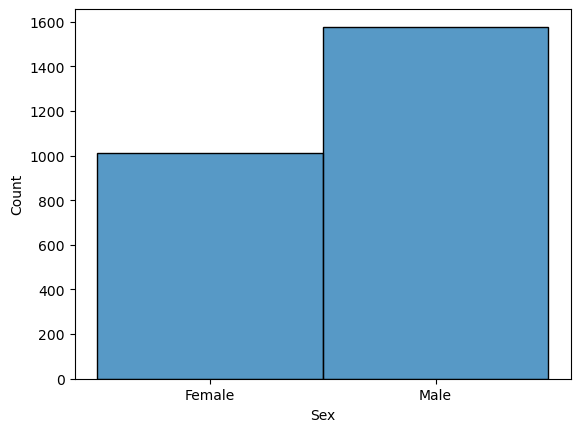

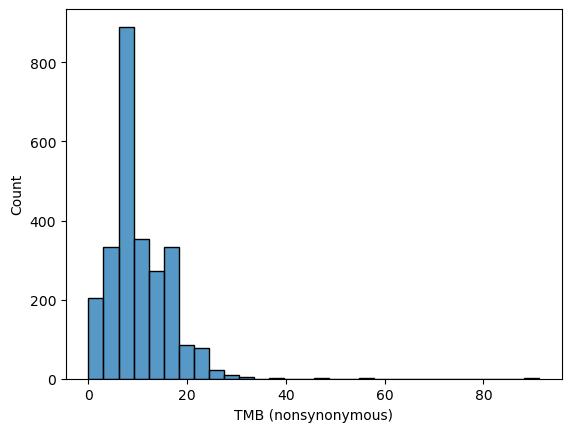

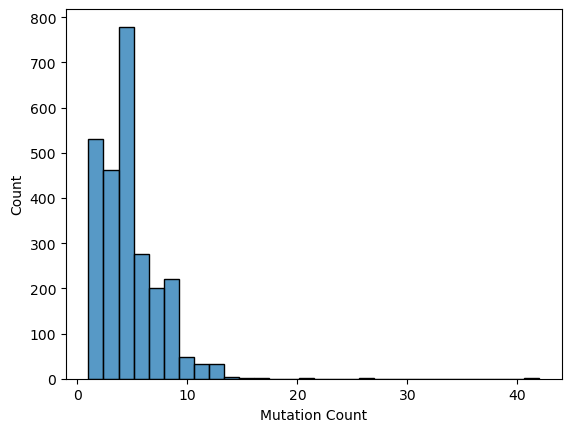

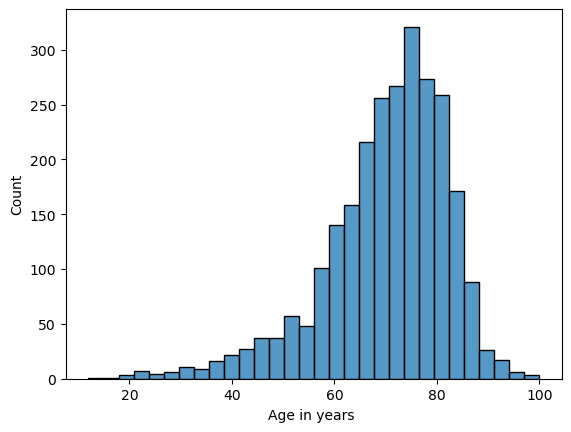

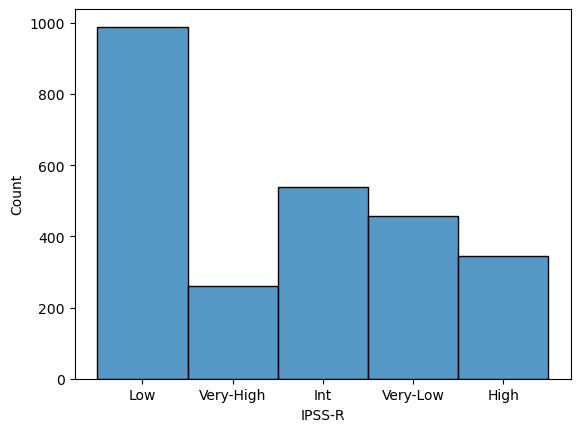

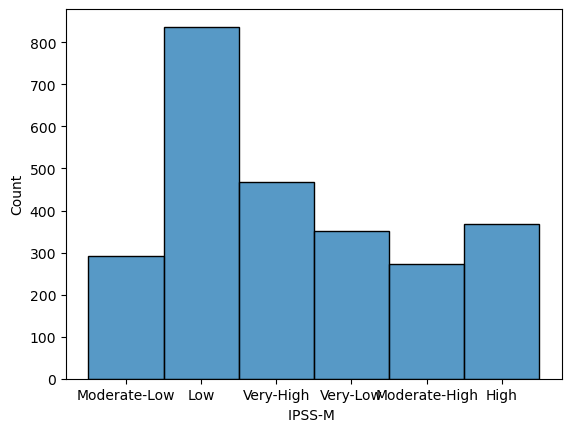

In [7]:
# for each QI unique value, count the number of records that have that value


def get_unique_value_counts(df, qi):
    unique_values = df[qi].unique()
    unique_value_counts = []
    for value in unique_values:
        unique_value_counts.append(len(df[df[qi] == value]))
    return unique_values, unique_value_counts

for qi in QI:
    print("Unique value counts for " + qi + ":")
    print(get_unique_value_counts(df, qi))
    print()

for att in QI:
    sns.histplot(data=df, x=att, bins=30)
    plt.show()
  
    print('\t')

In [102]:
# print min and max of each column
for col in QI:
    print(col, ':', min(df[col]), ',', max(df[col]))

TMB (nonsynonymous) : 0.0 , 91.33432931244822
Age in years  : 12.0 , 100.0
Mutation Count : 1.0 , 42.0
Sex : Female , Male
IPSS-R : High , Very-Low
IPSS-M  : High , Very-Low


## $k$-Anonimity

In [6]:
df.groupby(['Age in years ', 'Sex', 'IPSS-M ', 'IPSS-R', 'Mutation Count', 'TMB (nonsynonymous)']).size().reset_index(name='Count')

,Age in years,Sex,IPSS-M,IPSS-R,Mutation Count,TMB (nonsynonymous),Count
0,12.0,Male,Low,Low,2.0,4.349254,1
1,16.0,Female,Low,Int,3.0,6.523881,1
2,18.0,Female,Very-High,Int,5.0,10.873134,1
3,19.0,Female,Moderate-Low,Low,3.0,6.523881,1
4,19.0,Male,Very-High,Very-High,7.0,15.222388,1
...,...,...,...,...,...,...,...
2165,96.0,Male,Moderate-Low,Low,5.0,10.873134,1
2166,97.0,Male,Low,Low,4.0,6.523881,1
2167,98.0,Male,Low,Low,5.0,10.873134,1
2168,99.0,Male,Low,Low,5.0,10.873134,1


### IPSS-M Generalization

In [35]:
gen_map_IPSS_M_lev_1 = {'Very-Low': 'Low Risks', 'Low': 'Low Risks', 'Moderate-Low': 'Moderate Risks', 'Moderate-High':'Moderate Risks', 'High': 'High Risks', 'Very-High': 'High Risks'}
gen_map_IPSS_M_lev_2 = {'Low Risks': 'Low Risks', 'Moderate Risks': 'Not Low Risks', 'High Risks': 'Not Low Risks'}
gen_map_IPSS_M_lev_3 = {'Low Risks': 'IPSS-M Risks', 'Not Low Risks': 'IPSS-M Risks'}


df['IPSS-M L1'] = df['IPSS-M '].replace(gen_map_IPSS_M_lev_1)
df['IPSS-M L2'] = df['IPSS-M L1'].replace(gen_map_IPSS_M_lev_2)
df['IPSS-M L3'] = df['IPSS-M L2'].replace(gen_map_IPSS_M_lev_3)

print('Status OK.')

Status OK.


### IPSS-R Generalization

In [36]:
gen_map_IPSS_R_lev_1 = {'Very-Low': 'Low Risks', 'Low': 'Low Risks', 'Int': 'Intermidiate Risks', 'High': 'High Risks', 'Very-High': 'High Risks'}
gen_map_IPSS_R_lev_2 = {'Low Risks': 'Low Risks', 'Intermidiate Risks': 'Not Low Risks', 'High Risks': 'Not Low Risks'}
gen_map_IPSS_R_lev_3 = {'Low Risks': 'IPSS-R Risks', 'Not Low Risks': 'IPSS-R Risks'}

df['IPSS-R L1'] = df['IPSS-R'].replace(gen_map_IPSS_R_lev_1)
df['IPSS-R L2'] = df['IPSS-R L1'].replace(gen_map_IPSS_R_lev_2)
df['IPSS-R L3'] = df['IPSS-R L2'].replace(gen_map_IPSS_R_lev_3)

print('Status OK.')

Status OK.


### Age Generalization

In [84]:
C_q_age_1 = 3
C_q_age_2 = 4
C_q_age_3 = 5

df['Age intervals'] = pd.qcut(df['Age in years '], q = C_q_age_1)

print('Status OK.')

df['Age intervals'].value_counts()

Status OK.


(11.999, 67.0]    901
(67.0, 76.0]      844
(76.0, 100.0]     843
Name: Age intervals, dtype: int64

### Mutation Count Generalization

In [85]:
C_q_mc_1 = 3
C_q_mc_2 = 3
C_q_mc_3 = 5

df['Mutation Count intervals'] = pd.qcut(df['Mutation Count'], q = C_q_mc_1)

print('Status OK.')

df['Mutation Count intervals'].value_counts()

Status OK.


(0.999, 3.0]    992
(5.0, 42.0]     817
(3.0, 5.0]      779
Name: Mutation Count intervals, dtype: int64

### TMB Generalization

In [86]:
bins_tmb_1 = 3
bins_tmb_2 = 4
bins_tmb_3 = 4

df['TMB intervals'] = pd.cut(df['TMB (nonsynonymous)'], bins = bins_tmb_1)

print('Status OK.')

df['TMB intervals'].value_counts()

Status OK.


(-0.0913, 30.445]    2581
(30.445, 60.89]         6
(60.89, 91.334]         1
Name: TMB intervals, dtype: int64

In [87]:
C_1 = ['Age intervals', 'TMB intervals','Mutation Count intervals', 'IPSS-R L1', 'IPSS-M L1']
C_2 = ['Age intervals', 'TMB intervals','Mutation Count intervals', 'IPSS-R L1', 'IPSS-M L2']
C_3 = ['Age intervals', 'TMB intervals','Mutation Count intervals', 'IPSS-R L2', 'IPSS-M L3']

df_kAnon = df.groupby(C_1).size().reset_index(name='Count').sort_values('Count')
# remove blocks where Count = 0
df_kAnon = df_kAnon[df_kAnon['Count'] >= 1]
df_kAnon

,Age intervals,TMB intervals,Mutation Count intervals,IPSS-R L1,IPSS-M L1,Count
19,"(11.999, 67.0]","(-0.0913, 30.445]","(5.0, 42.0]",High Risks,Low Risks,1
48,"(11.999, 67.0]","(30.445, 60.89]","(5.0, 42.0]",Intermidiate Risks,High Risks,1
213,"(76.0, 100.0]","(30.445, 60.89]","(5.0, 42.0]",Low Risks,High Risks,1
215,"(76.0, 100.0]","(30.445, 60.89]","(5.0, 42.0]",Low Risks,Moderate Risks,1
172,"(76.0, 100.0]","(-0.0913, 30.445]","(3.0, 5.0]",High Risks,Low Risks,1
...,...,...,...,...,...,...
97,"(67.0, 76.0]","(-0.0913, 30.445]","(3.0, 5.0]",Low Risks,Low Risks,111
178,"(76.0, 100.0]","(-0.0913, 30.445]","(3.0, 5.0]",Low Risks,Low Risks,135
169,"(76.0, 100.0]","(-0.0913, 30.445]","(0.999, 3.0]",Low Risks,Low Risks,162
88,"(67.0, 76.0]","(-0.0913, 30.445]","(0.999, 3.0]",Low Risks,Low Risks,182


In [88]:
df_kAnon = df.groupby(C_1).size().reset_index(name='Count').sort_values('Count')
# remove blocks where Count = 0
df_kAnon = df_kAnon[df_kAnon['Count'] <10]
#print the sum of count
print("Sum of count: ", sum(df_kAnon['Count']))

Sum of count:  108
